In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
config_profession = "GQ01"

config_unique_code_variable = "PD14_01"

config_learning_years = "GQ03_03"

config_answer_variables = ['PT03_01', 'PT08_01', 'PT13_01', 'PT18_01', 'PT23_01','PT28_01', 'PT33_01', 'PT38_01', 'PT43_01', 'PT48_01']

config_difficulty_variables = ['PT04', 'PT09', 'PT14', 'PT19', 'PT24', 'PT30', 'PT34', 'PT39', 'PT44', 'PT49']

config_time_variables = ['TIME006','TIME008','TIME010','TIME012', 'TIME014','TIME016','TIME018','TIME020','TIME022', 'TIME024']

config_click_variables = ['PT01_01', 'PT06_01', 'PT11_01', 'PT16_01', 'PT21_01','PT26_01', 'PT31_01', 'PT36_01', 'PT41_01', 'PT46_01']


config_datasheet = r'./data/raw/pretest.xlsx'
compare_datasheet = "results/behavioral/compare/compare.xlsx"
pretest_datasheet = r'./results/preprocessed/preprocessed_pretest.xlsx'
posttest_datasheet = r'./results/preprocessed/preprocessed_posttest.xlsx'

In [131]:
raw = pd.read_excel(config_datasheet)
raw_compare = pd.read_excel(compare_datasheet)
raw_pretest = pd.read_excel(pretest_datasheet)
raw_posttest = pd.read_excel(posttest_datasheet)
df = pd.DataFrame(raw)
df_compare = pd.DataFrame(raw_compare)
df_pretest = pd.DataFrame(raw_pretest)
df_posttest = pd.DataFrame(raw_posttest)


unique_codes = df_compare["Unique Code"].unique()

df = df[['PD14_01', 'PD07', 'PD08_01', 'GQ01','GQ03_01', 'GQ03_03', 'GQ05','GQ08', 'GQ09', 'GQ10', 'GQ11', 'GQ06_01', 'GQ12_01', 'GQ13_01']]

df = df.rename(columns={"PD14_01": "Unique Code", "PD07": "Gender", "PD08_01": "Alter", "GQ01":"Beruf", 
                        "GQ03_01": "Programmieren lernen", "GQ03_03" : "Beruflich programmieren", "GQ05": "Java",
                        "GQ08": "Skills", "GQ09" : "C++", "GQ10" : "C", "GQ11" : "Python", "GQ06_01" : "Andere Sprache",
                        "GQ12_01" : "Studiengang", "GQ13_01" : "Fachsemester"})


df['Studiengang'] = df['Studiengang'].replace({'Informatik für Geistes- und Socialwissenschaften': 'Informatik für Geistes- und Sozialwissenschaftler', 
                           'Master Informatik für Geistes- und Sozialwissenschaftler': 'Informatik für Geistes- und Sozialwissenschaftler', 'Bachelor Angewandte Informatik' : 'Angewandte Informatik'})
df.loc[df['Gender'] == 1, 'Gender'] = 'männlich'
df.loc[df['Gender'] == 2, 'Gender'] = 'weiblich'

df.loc[df['Beruf'] == 1, 'Beruf'] = 'Bachelor'
df.loc[df['Beruf'] == 2, 'Beruf'] = 'Master'
df.loc[df['Beruf'] == 5, 'Beruf'] = 'Anderes'

df.loc[df['Fachsemester'] == '2. Fachsemester', 'Fachsemester'] = 2
df.loc[df['Fachsemester'] == '2. Fachsemester/ 4. Semester', 'Fachsemester'] = 2


df = df[df['Unique Code'].isin(unique_codes)]


skills = df['Skills'].value_counts().sort_index()
course = df['Studiengang'].value_counts().sort_index()
gender = df['Gender'].value_counts().sort_index()
profession = df['Beruf'].value_counts().sort_index()
learning_experience = df['Programmieren lernen'].value_counts().sort_index()
professional_experience = df['Beruflich programmieren'].value_counts().sort_index()
semester = df['Fachsemester'].value_counts()
java_experience = df['Java'].value_counts().sort_index()
cpp_experience = df['C++'].value_counts().sort_index()
c_experience = df['C'].value_counts().sort_index()
python_experience = df['Python'].value_counts().sort_index()


#display(c_experience)
#print(c_experience.mean(axis = 0))

#display(c_experience.std())


tmp = [course, gender, profession, learning_experience, 
       professional_experience, semester, java_experience,
      cpp_experience, c_experience, python_experience]



tmp_df = pd.DataFrame(tmp)
tmp_df.to_excel("results/test.xlsx")

from scipy.stats import ttest_ind

df.to_excel("results/teilnehmer.xlsx")

mean_learning = float(df["Programmieren lernen"].mean())
stddev_learning = float(df["Programmieren lernen"].std())

mean_age = float(df["Alter"].mean())

mean_java = float(df["Java"].mean())
stddev_java = float(df["Java"].std())

mean_professional = float(df["Beruflich programmieren"].mean())
stddev_professional = float(df["Beruflich programmieren"].std())

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2    7
3    8
4    5
5    1
Name: Skills, dtype: int64>

In [96]:
import sidetable
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages



gender_table = df.stb.freq(['Gender'])

print(gender_table.values[0][0])


del gender_table['percent']
del gender_table['cumulative_count']
del gender_table['cumulative_percent']

männlich


## 

In [31]:
study_table = df.stb.freq(['Studiengang'])

del study_table['percent']
del study_table['cumulative_count']
del study_table['cumulative_percent']

study_table = study_table.rename(columns={'count': 'Anzahl'})

In [103]:
test = pd.DataFrame([[gender_table.columns[0], gender_table.values[0][0], gender_table.values[0][1]],
                     ['', gender_table.values[1][0], gender_table.values[1][1]],
                     [study_table.columns[0], study_table.values[0][0], study_table.values[0][1]],
                     ['', study_table.values[1][0], study_table.values[1][1]],
                     ['', study_table.values[2][0], study_table.values[2][1]],
                     ['', study_table.values[3][0], study_table.values[3][1]],
                     ['', study_table.values[4][0], study_table.values[4][1]],
                     ['', study_table.values[5][0], study_table.values[5][1]],
                    
                    ], columns=['Variable', 'Level', 'Anzahl'])

Latex Tabelle erzeugen

In [138]:
import os 

programming_experience_education = df["Programmieren lernen"]
programming_experience_professional = df["Beruflich programmieren"]
java_experience = df["Java"]
skills = df["Skills"]

age = df["Alter"]
semester = df["Fachsemester"].astype(str).astype(int)

print(skills.describe()['mean'])
print(skills.describe()['std'])
skills_mean = str(round(skills.describe()['mean'], 2)) + " + " + str(round(skills.describe()['std'], 2))
java_experience_mean = str(round(java_experience.describe()['mean'], 2)) + " + " + str(round(java_experience.describe()['std'], 2))

programming_experience_education_mean = str(round(programming_experience_education.describe()['mean'], 2)) + " + " + str(round(programming_experience_education.describe()['std'], 2))
programming_experience_professional_mean = str(round(programming_experience_professional.describe()['mean'], 2)) + " + " + str(round(programming_experience_professional.describe()['std'], 2))


age_mean = str(round(age.describe()['mean'], 2)) + " + " + str(round(age.describe()['std'], 2))
semester_mean = str(round(semester.describe()['mean'], 2)) + " + " + str(round(semester.describe()['std'], 2))



metric_df = pd.DataFrame([
                         [gender_table.values[0][0], gender_table.values[0][1]],
                         [gender_table.values[1][0], gender_table.values[1][1]],
                         [age.name, age_mean],
                         [semester.name, semester_mean],
                         [programming_experience_education.name, programming_experience_education_mean],
                         [programming_experience_professional.name, programming_experience_professional_mean],
                         ["Java", java_experience_mean],
                         ["Skills", skills_mean],
                         ],
                        columns=['Variable',  'Mean + Std'])





display(metric_df)
with open(
os.path.join(os.getcwd(),"demografie.tex"), "w"
) as tf:
    tf.write(metric_df
             .round(2)
             .to_latex(
             index=False,
             caption="Demografische Daten",
                 label="demografie",
                 escape=False,
                 column_format="cccccc",
             ))

count    21.000000
mean      2.809524
std       1.990453
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       8.000000
Name: Programmieren lernen, dtype: float64
3.0
0.8944271909999159


,Variable,Mean + Std
0,männlich,16
1,weiblich,5
2,Alter,21.38 + 3.76
3,Fachsemester,2.48 + 1.17
4,Programmieren lernen,2.81 + 1.99
5,Beruflich programmieren,0.43 + 0.93
6,Java,2.76 + 1.22
7,Skills,3.0 + 0.89


In [26]:
with open(
    os.path.join(os.getcwd(),"test.tex"), "w"
) as tf:
    tf.write(test
             .to_latex(
             index=False,
             caption="This is the caption",
                 label="tab:table_label",
                 escape=False,
                 column_format="ccc",
             ))

In [124]:
click_log_pre = df_pretest["ClickData"].unique()
click_log_post = df_posttest["ClickData"].unique()

algo_names_pre = df_pretest["Algorithm"].unique()
algo_names_post = df_posttest["Algorithm"].unique()

list_of_average_lists_pre = []
list_of_average_lists_post = []

for algo in algo_names_pre:
    clicks = []
    tmp_df = df_pretest.loc[df_pretest["Algorithm"] == algo]["ClickData"]
    tmp_list = []
    
    for tmp in tmp_df:
        tmp = str(tmp)
        tmp = tmp.split()
        tmp_list.append(len(tmp))
    list_of_average_lists_pre.append(tmp_list)


for algo in algo_names_post:
    clicks = []
    tmp_df = df_posttest.loc[df_posttest["Algorithm"] == algo]["ClickData"]
    tmp_list = []
    
    for tmp in tmp_df:
        tmp = str(tmp)
        tmp = tmp.split()
        tmp_list.append(len(tmp))
    list_of_average_lists_post.append(tmp_list)
    
    
average_list_pre = []
average_list_post = []

std_dev_pre = {}
std_dev_post = {}


for algo in algo_names_pre:
    #d['mynewkey'] = 'mynewvalue'
    std_dev_pre[algo] = df_pretest.loc[df_pretest["Algorithm"]==algo]["ResponseTime"].std()
    #std_dev_pre.append(algo: df_pretest.loc[df_pretest["Algorithm"]==algo]["ResponseTime"].std())
    
for algo in algo_names_post:
    std_dev_post[algo] = df_posttest.loc[df_posttest["Algorithm"]==algo]["ResponseTime"].std()

for i in range(len(list_of_average_lists_pre)):
    average_list_pre.append(round(sum(list_of_average_lists_pre[i]) / len(list_of_average_lists_pre[i])))
    
for i in range(len(list_of_average_lists_post)):
    average_list_post.append(round(sum(list_of_average_lists_post[i]) / len(list_of_average_lists_post[i])))
    
    
for i in range(len(algo_names_pre)):
    if algo_names_pre[i] != algo_names_post[i]:
        algo_names_pre[i] += "/" + algo_names_post[i]

fixation = {'Algorithmus':algo_names_pre, 'Pretest':average_list_pre, 'Posttest':average_list_post}


for k, v in std_dev_post.items():
    print(k, v)
    

    
#Swap 56
#ReverseString

fixation_df = pd.DataFrame(fixation)

with open(
    os.path.join(os.getcwd(),"FixationCount.tex"), "w"
) as tf:
    tf.write(fixation_df
            .to_latex(
            index=False,
            escape=False,
            column_format="lll",
             ))

CommonChars 32.81932700571761
IsPalindrome 233.09864975902482
ReverseString 21.377912702486913
ReverseArray 37.831364252589694
BinarySearchStrings 81.38648376886509
Multiples 45.70988885781652
Power 31.424478285213194
GetMiddle 96.31560000952496
InsertionSort 151.87893903109844
SquareRoot 34.65988112079093


C:\Users\Dominik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


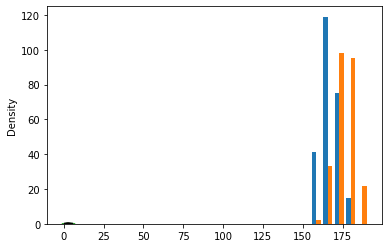

In [12]:
mu = df["Java"].mean()
sigma = df["Java"].std()


# Plot the histogram.
plt.hist(gym, bins=5)

sns.distplot(x, kde=True, bins=20, hist=True)

plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

,C,C++,Java,Python
0,3,3,4,3
4,4,1,4,4
5,3,4,2,3
9,4,4,3,4
12,3,1,3,3
13,3,2,2,4
16,4,2,2,3
17,4,1,2,2
18,3,1,1,3
28,3,3,2,2


count    21.000000
mean      3.142857
std       0.853564
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Python, dtype: float64


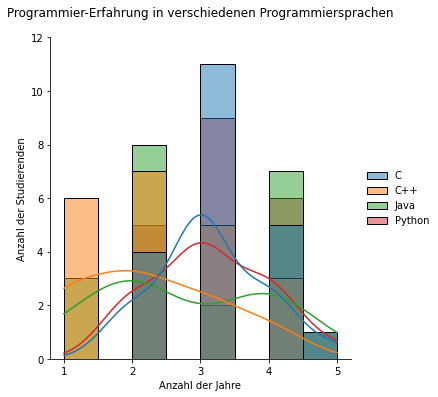

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



display(tmp)
print(tmp['Python'].describe())
g = sns.displot(tmp, kde=True)
g.set(xticks=np.arange(1,6,1))
g.set(yticks=np.arange(0,14,2))
g.set_xticklabels(['1','2','3','4','5'])
#x.set_xlim(1,2)
g.set(xlabel='Anzahl der Jahre', ylabel='Anzahl der Studierenden', title='Programmier-Erfahrung in verschiedenen Programmiersprachen\n')
plt.savefig('Programmiererfahrung_Programmiersprachen.pdf', bbox_inches='tight')
plt.show()

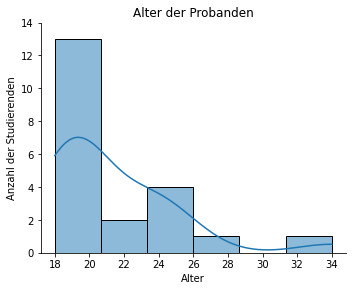

In [20]:
age = df[['Alter']]

g = sns.displot(age, x='Alter', kde=True)
#g.set(xticks=np.arange(1,6,1))
#g.set(yticks=np.arange(0,14,2))
#g.set_xticklabels(['1','2','3','4','5'])
#x.set_xlim(1,2)
g.set(yticks=np.arange(0,16,2))
g.set(xlabel='Alter', ylabel='Anzahl der Studierenden', title = "Alter der Probanden", aspect=0.95)
plt.savefig('Alter_der_Probanden.pdf', bbox_inches='tight')
plt.show()

In [24]:
df_java_advanced, df_java_beginner = [x for _, x in df.groupby(df['Java'] < 3)]

unique_codes_beginner = df_java_beginner["Unique Code"].unique()
unique_codes_advanced = df_java_advanced["Unique Code"].unique()

display(unique_codes_beginner)
display(unique_codes_advanced)
#df_beginner = df["Programmieren"]
#df["Programmieren beruflich"].sort_values()

array(['6aOGho', '8aRHui', '1aMLsa', '5nDFhi', '9aBWha', '1eASaa',
       '8lHHsu', '4aRGür', '2eTGer', '1nCWte', '4iMVha'], dtype=object)

array(['1nUSüa', '2nGAhe', '1aTGsa', '6aJGhh', '6vEHhi', '9oMWun',
       '3rCHei', '4uCGer', '5uHJei', '5nFKho'], dtype=object)